<h1 align=center><font size = 6>An Exploration of the Population and Venues Data of Leeds, UK; </font></h1>
<h1 align=center><font size = 6>Does Leeds Need Another Thai Restaurant?</font></h1>
<h1 align=center><font size = 5>Applied Data Science Capstone Project - The Battle of Neighborhoods</font></h1>
<h1 align=center><font size = 5>By Anthony Swain, PhD</font></h1>
<h1 align=center><font size = 4>Published to GitHub on March 2 2020</font></h1>

### Make the necessary basic imports: 

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import requests

print("Imports complete")

Imports complete


### Master data frame construction

Import data from https://en.wikipedia.org/wiki/LS_postcode_area by simply using the pandas pd.read_html() funcion

In [6]:
link = 'https://en.wikipedia.org/wiki/LS_postcode_area'
LStable = pd.read_html(link,header=0)[1]
LStable.head()

,Postcode district,Post town,Coverage,Local authority area
0,LS1,LEEDS,Leeds city centre,Leeds
1,LS2,LEEDS,"Leeds city centre, Woodhouse",Leeds
2,LS3,LEEDS,"Burley, Kirkstall, Woodhouse",Leeds
3,LS4,LEEDS,"Burley, Kirkstall",Leeds
4,LS5,LEEDS,"Hawksworth, Kirkstall",Leeds


Drop the unnecessaey 'Non-geographic' rows from the dataframe and remove unnecessary columns.

In [7]:
LStable.drop(LStable[LStable['Local authority area']=='Non-geographic'].index,inplace=True)
LStable.drop(columns=['Post town','Local authority area'],inplace=True)
LStable.rename(columns={'Coverage':'Area'}, inplace=True)
LStable.head()

,Postcode district,Area
0,LS1,Leeds city centre
1,LS2,"Leeds city centre, Woodhouse"
2,LS3,"Burley, Kirkstall, Woodhouse"
3,LS4,"Burley, Kirkstall"
4,LS5,"Hawksworth, Kirkstall"


Import extention to read excel files

In [8]:
!conda install -c anaconda xlrd --yes
print("Imports complete")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    xlrd-1.2.0                 |             py_0         108 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0      --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0 --> 2019.11.28-py36_0 anaconda
    openssl:         1.1.1d-h7b6447c_3 --> 1.1.1-h7b6447c_0  anaconda
    xlrd:            1.2.0-py_0       

Download population data from http://www.nomisweb.co.uk/api/v01/dataset/nm_144_1.bulk.csv?time=latest&measures=20100&rural_urban=total&geography=TYPE275 (Converted to an Excel file and hosted on my GitHub)

In [9]:
df_ukpopdata=pd.read_excel('https://github.com/Hakase102/Coursera-CourseworkAS/blob/master/bulk.xls?raw=true',
                          sheet_name='bulk.csv',
                          )
print("Import complete")

Import complete


View the headers

In [10]:
df_ukpopdata.head()

,date,geography,geography code,Rural Urban,Variable: All usual residents; measures: Value,Variable: Males; measures: Value,Variable: Females; measures: Value,Variable: Lives in a household; measures: Value,Variable: Lives in a communal establishment; measures: Value,Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value,Variable: Area (Hectares); measures: Value,Variable: Density (number of persons per hectare); measures: Value
0,2011,AL1,AL1,Total,36180,17993,18187,35902,278,616,1055.02,34.3
1,2011,AL10,AL10,Total,35900,18327,17573,32907,2993,367,2023.54,17.7
2,2011,AL2,AL2,Total,23604,11596,12008,23337,267,351,3734.88,6.3
3,2011,AL3,AL3,Total,28462,13830,14632,28061,401,544,6803.77,4.2
4,2011,AL4,AL4,Total,27268,13388,13880,27102,166,601,5299.97,5.1


Drop unnecessary columns, rename the column to understand the total population and observe the head of the new data frame

In [11]:
df_ukpopdata.drop(['date', 'geography code', 'Rural Urban', 'Variable: Males; measures: Value', 'Variable: Females; measures: Value', 'Variable: Lives in a household; measures: Value','Variable: Lives in a communal establishment; measures: Value', 'Variable: Schoolchild or full-time student aged 4 and over at their non term-time address; measures: Value', 'Variable: Area (Hectares); measures: Value', 'Variable: Density (number of persons per hectare); measures: Value'], axis=1, inplace=True)
df_ukpopdata.rename(columns={'Variable: All usual residents; measures: Value':'Population'}, inplace=True)
df_ukpopdata.head()

,geography,Population
0,AL1,36180
1,AL10,35900
2,AL2,23604
3,AL3,28462
4,AL4,27268


Merge with the master dataframe

In [12]:
dfLeeds=pd.merge(LStable,df_ukpopdata,how='inner',left_on='Postcode district',right_on='geography',validate=None)
dfLeeds.head()

,Postcode district,Area,geography,Population
0,LS1,Leeds city centre,LS1,5759
1,LS2,"Leeds city centre, Woodhouse",LS2,10120
2,LS3,"Burley, Kirkstall, Woodhouse",LS3,2876
3,LS4,"Burley, Kirkstall",LS4,9072
4,LS5,"Hawksworth, Kirkstall",LS5,8507


Download the location data of all area postcodes in the uk from https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv

In [13]:
!wget -q -O 'postcode-outcodes.csv' https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv
df_ukgeodata=pd.read_csv('postcode-outcodes.csv')
print("Import complete")

Import complete


Add capitalization to the latitude and longitude columns for formatting purposes

In [14]:
df_ukgeodata.rename(columns={'latitude':'Latitude','longitude':'Longitude'}, inplace=True)
df_ukgeodata.head()

,id,postcode,Latitude,Longitude
0,2,AB10,57.13514,-2.11731
1,3,AB11,57.13875,-2.09089
2,4,AB12,57.10100,-2.11060
3,5,AB13,57.10801,-2.23776
4,6,AB14,57.10076,-2.27073


Drop the unnecessaey columns from the table.

In [15]:
dfLeeds=pd.merge(dfLeeds,df_ukgeodata,how='inner',left_on='Postcode district',right_on='postcode',validate=None)
dfLeeds.head()

,Postcode district,Area,geography,Population,id,postcode,Latitude,Longitude
0,LS1,Leeds city centre,LS1,5759,1488,LS1,53.79674,-1.54754
1,LS2,"Leeds city centre, Woodhouse",LS2,10120,1499,LS2,53.80123,-1.54597
2,LS3,"Burley, Kirkstall, Woodhouse",LS3,2876,1510,LS3,53.80128,-1.55964
3,LS4,"Burley, Kirkstall",LS4,9072,1511,LS4,53.80944,-1.58082
4,LS5,"Hawksworth, Kirkstall",LS5,8507,1512,LS5,53.81851,-1.60199


Drop the unnecessaey columns from the dataframe. 

In [16]:
dfLeeds.drop(columns=['id','postcode','geography'],inplace=True)

dfLeeds

,Postcode district,Area,Population,Latitude,Longitude
0,LS1,Leeds city centre,5759,53.79674,-1.54754
1,LS2,"Leeds city centre, Woodhouse",10120,53.80123,-1.54597
2,LS3,"Burley, Kirkstall, Woodhouse",2876,53.80128,-1.55964
3,LS4,"Burley, Kirkstall",9072,53.80944,-1.58082
4,LS5,"Hawksworth, Kirkstall",8507,53.81851,-1.60199
5,LS6,"Beckett Park, Burley, Headingley, Hyde Park, M...",48277,53.81928,-1.56704
6,LS7,"Beck Hill, Buslingthorpe, Chapel Allerton, Cha...",28266,53.81828,-1.53971
7,LS8,"Fearnville, Gipton, Gledhow, Harehills, Oakwoo...",48286,53.82445,-1.50926
8,LS9,"Burmantofts, Cross Green, East End Park, Gipto...",36406,53.79928,-1.50803
9,LS10,"Belle Isle, Hunslet, Leeds city centre, Middle...",35534,53.76162,-1.53123


In [17]:
dfLeeds.shape

(29, 5)

At this point the master data frame has now been constructed and analysis of the data can now begin.

### Establish the location data

Import necessary packages for visualization:

In [18]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

Determine the latitude and longitude for Leeds, UK. 

In [19]:
address = 'Leeds, UK'
geolocator = Nominatim(user_agent="Leeds_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print ('latitude and longitude for Leeds : {}, {}'.format(latitude,longitude))

latitude and longitude for Leeds : 53.7974185, -1.5437941


Create a folium map to visualize the Postcode districts/Areas.

In [83]:
map_Leeds = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, borough, neighborhood in zip(dfLeeds['Latitude'], dfLeeds['Longitude'], dfLeeds['Postcode district'], dfLeeds['Area']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Leeds)  
    

map_Leeds

### Leverage Foursquare for venue data

Access Foursquare

In [33]:
CLIENT_ID = '5GTN22ETYY5NQSF2ROCZPOWM2D2JTOIALINFB1R3IIMJWJEY' #Foursquare ID
CLIENT_SECRET = 'BFFXMAXDILID4V041H2PS4WN031N4GHKXPSVBPZ3PRKW5531' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 5GTN22ETYY5NQSF2ROCZPOWM2D2JTOIALINFB1R3IIMJWJEY
CLIENT_SECRET:BFFXMAXDILID4V041H2PS4WN031N4GHKXPSVBPZ3PRKW5531


Import Matplotlib for plotting charts later

In [34]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.0.2


Query the location data of each area using Foursquare.

In [35]:
LIMIT=1000
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
            
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # append only relevant information for each nearby venue
        venues_list.append([(name,lat,lng,v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
print('Complete')

Complete


Find the shape of the dataframe. In order to determine the total number of venues found. 

In [36]:
Leeds_venues = getNearbyVenues(names=dfLeeds['Area'],latitudes=dfLeeds['Latitude'],longitudes=dfLeeds['Longitude'])
print(Leeds_venues.shape)

(355, 7)


View the dataframe head.

In [37]:
Leeds_venues.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Leeds city centre,53.79674,-1.54754,La Bottega Milanese,53.797963,-1.548039,Coffee Shop
1,Leeds city centre,53.79674,-1.54754,Bundobust,53.795415,-1.545622,Bar
2,Leeds city centre,53.79674,-1.54754,MOD Pizza,53.797440,-1.545289,Pizza Place
3,Leeds city centre,53.79674,-1.54754,The Head Of Steam,53.795189,-1.545859,Pub
4,Leeds city centre,53.79674,-1.54754,Friends of Ham,53.795470,-1.544944,Bar


Count the venues in each area.

In [39]:
Leeds_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
"Aberford, Garforth, Hillam, Kippax, Ledsham, Micklefield, Monk Fryston, Sherburn-in-Elmet, South Milford",2,2,2,2,2,2
"Addingham, Ben Rhydding, Burley in Wharfedale, Ilkley, Menston",1,1,1,1,1,1
"Adel, Bramhope, Cookridge, Eccup, Far Headingley, Holt Park, Ireland Wood, Lawnswood, Moor Grange, Tinshill, Weetwood, West Park",1,1,1,1,1,1
"Alwoodley, Bardsey, East Keswick, Eccup, Harewood, Moortown, Shadwell, Weardley, Wike",3,3,3,3,3,3
"Armley, Farnley, New Farnley, Wortley",3,3,3,3,3,3
"Arthington, Otley, Pool, Fewston, Blubberhouses",2,2,2,2,2,2
"Austhorpe, Barwick-in-Elmet, Colton, Cross Gates, Halton, Halton Moor, Manston, Pendas Fields, Scholes, Temple Newsam, Whitkirk",8,8,8,8,8,8
"Bagley, Calverley, Farsley, Fulneck, Pudsey, Stanningley",7,7,7,7,7,7
"Beck Hill, Buslingthorpe, Chapel Allerton, Chapeltown, Little London, Lovell Park, Meanwood, Miles Hill, Potternewton, Scott Hall, Sheepscar",2,2,2,2,2,2


In [40]:
print('There are {} uniques categories.'.format(len(Leeds_venues['Venue Category'].unique())))

There are 104 uniques categories.


Plot a bar chart of all the venues

In [41]:
dfallvenues = Leeds_venues.groupby('Area').count()
dfallvenues.head()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
"Aberford, Garforth, Hillam, Kippax, Ledsham, Micklefield, Monk Fryston, Sherburn-in-Elmet, South Milford",2,2,2,2,2,2
"Addingham, Ben Rhydding, Burley in Wharfedale, Ilkley, Menston",1,1,1,1,1,1
"Adel, Bramhope, Cookridge, Eccup, Far Headingley, Holt Park, Ireland Wood, Lawnswood, Moor Grange, Tinshill, Weetwood, West Park",1,1,1,1,1,1
"Alwoodley, Bardsey, East Keswick, Eccup, Harewood, Moortown, Shadwell, Weardley, Wike",3,3,3,3,3,3
"Armley, Farnley, New Farnley, Wortley",3,3,3,3,3,3


In [42]:
dfallvenues.drop(columns=['Area Latitude','Area Longitude','Venue Latitude','Venue Longitude','Venue Category'],inplace=True)
dfallvenues.head()

,Venue
Area,
"Aberford, Garforth, Hillam, Kippax, Ledsham, Micklefield, Monk Fryston, Sherburn-in-Elmet, South Milford",2
"Addingham, Ben Rhydding, Burley in Wharfedale, Ilkley, Menston",1
"Adel, Bramhope, Cookridge, Eccup, Far Headingley, Holt Park, Ireland Wood, Lawnswood, Moor Grange, Tinshill, Weetwood, West Park",1
"Alwoodley, Bardsey, East Keswick, Eccup, Harewood, Moortown, Shadwell, Weardley, Wike",3
"Armley, Farnley, New Farnley, Wortley",3


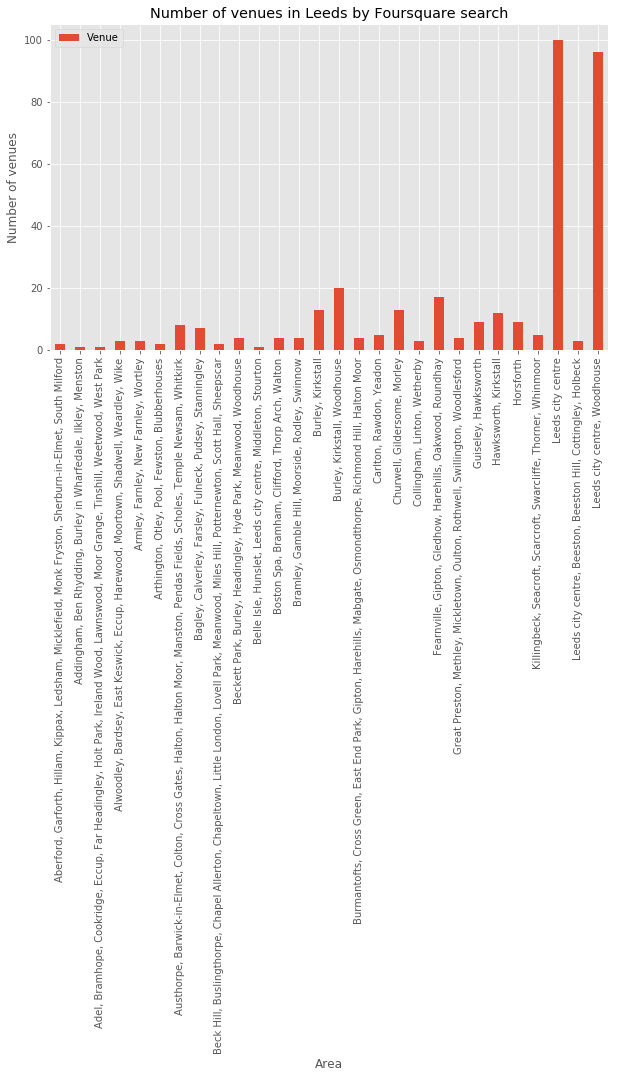

In [43]:
dfallvenues.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Area') 
plt.ylabel('Number of venues') 
plt.title('Number of venues in Leeds by Foursquare search')

plt.show()

Analyze each area using one hot encoding

In [44]:
# one hot encoding
Leeds_onehot = pd.get_dummies(Leeds_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Leeds_onehot ['Area'] = Leeds_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [Leeds_onehot.columns[-1]] + list(Leeds_onehot.columns[:-1])
Leeds_onehot = Leeds_onehot[fixed_columns]

Leeds_onehot.head()

,Area,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bookstore,Boutique,Brazilian Restaurant,Bridal Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cuban Restaurant,Deli / Bodega,Department Store,Discount Store,Electronics Store,English Restaurant,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Home Service,Hookah Bar,Hotel,Hotel Bar,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Lounge,Middle Eastern Restaurant,Museum,Music Venue,Nightclub,Optical Shop,Outlet Store,Park,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Record Shop,Restaurant,Road,Sandwich Place,Shopping Mall,Shopping Plaza,Speakeasy,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,University,Veterinarian,Video Store,Wine Bar
0,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
Leeds_onehot.shape

(355, 105)

### Clean the data to remove unnecessary venues

Using the results of the Leeds_onehot, alter the venue dataframe to remove non essential information. 

In [46]:
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Art Gallery'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Arts & Crafts Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Athletics & Sports'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Auto Garage'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Auto Workshop'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Bed & Breakfast'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Bookstore'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Boutique'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Bridal Shop'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Bus Station'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Bus Stop'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Butcher'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Chocolate Shop'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Climbing Gym'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Clothing Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Concert Hall'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Convenience Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Deli / Bodega'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Department Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Discount Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Electronics Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Film Studio'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Flea Market'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Food & Drink Shop'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Furniture / Home Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Garden'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Garden Center'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Golf Course'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Grocery Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Gym'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Gym / Fitness Center'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Hardware Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Home Service'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Hotel'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Indie Movie Theater'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Lounge'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Museum'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Music Venue'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Nightclub'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Optical Shop'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Outlet Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Park'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Pharmacy'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Platform'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Playground'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Plaza'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Pool Hall'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Record Shop'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Road'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Shopping Mall'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Shopping Plaza'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Sporting Goods Shop'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Sports Club'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Supermarket'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Theater'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Thrift / Vintage Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Toy / Game Store'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Train Station'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='University'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Veterinarian'].index,inplace=True)
Leeds_venues.drop(Leeds_venues[Leeds_venues['Venue Category']=='Video Store'].index,inplace=True)
print("Complete")

Complete


In [47]:
print(Leeds_venues.shape)

(224, 7)


Count the number of Thai Restaurants in Leeds

In [48]:
print(Leeds_onehot['Thai Restaurant'].iloc[1:].astype(int).sum())

8


Repeat the above analysis

In [49]:
Leeds_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
"Addingham, Ben Rhydding, Burley in Wharfedale, Ilkley, Menston",1,1,1,1,1,1
"Alwoodley, Bardsey, East Keswick, Eccup, Harewood, Moortown, Shadwell, Weardley, Wike",2,2,2,2,2,2
"Armley, Farnley, New Farnley, Wortley",1,1,1,1,1,1
"Arthington, Otley, Pool, Fewston, Blubberhouses",1,1,1,1,1,1
"Austhorpe, Barwick-in-Elmet, Colton, Cross Gates, Halton, Halton Moor, Manston, Pendas Fields, Scholes, Temple Newsam, Whitkirk",2,2,2,2,2,2
"Bagley, Calverley, Farsley, Fulneck, Pudsey, Stanningley",3,3,3,3,3,3
"Beck Hill, Buslingthorpe, Chapel Allerton, Chapeltown, Little London, Lovell Park, Meanwood, Miles Hill, Potternewton, Scott Hall, Sheepscar",1,1,1,1,1,1
"Boston Spa, Bramham, Clifford, Thorp Arch, Walton",1,1,1,1,1,1
"Bramley, Gamble Hill, Moorside, Rodley, Swinnow",3,3,3,3,3,3


In [50]:
print('There are {} uniques categories.'.format(len(Leeds_venues['Venue Category'].unique())))

There are 43 uniques categories.


In [51]:
dfleedsfood = Leeds_venues.groupby('Area').count()
dfleedsfood.head()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
"Addingham, Ben Rhydding, Burley in Wharfedale, Ilkley, Menston",1,1,1,1,1,1
"Alwoodley, Bardsey, East Keswick, Eccup, Harewood, Moortown, Shadwell, Weardley, Wike",2,2,2,2,2,2
"Armley, Farnley, New Farnley, Wortley",1,1,1,1,1,1
"Arthington, Otley, Pool, Fewston, Blubberhouses",1,1,1,1,1,1
"Austhorpe, Barwick-in-Elmet, Colton, Cross Gates, Halton, Halton Moor, Manston, Pendas Fields, Scholes, Temple Newsam, Whitkirk",2,2,2,2,2,2


In [52]:
dfleedsfood.drop(columns=['Area Latitude','Area Longitude','Venue Latitude','Venue Longitude','Venue Category'],inplace=True)
dfleedsfood.head()

,Venue
Area,
"Addingham, Ben Rhydding, Burley in Wharfedale, Ilkley, Menston",1
"Alwoodley, Bardsey, East Keswick, Eccup, Harewood, Moortown, Shadwell, Weardley, Wike",2
"Armley, Farnley, New Farnley, Wortley",1
"Arthington, Otley, Pool, Fewston, Blubberhouses",1
"Austhorpe, Barwick-in-Elmet, Colton, Cross Gates, Halton, Halton Moor, Manston, Pendas Fields, Scholes, Temple Newsam, Whitkirk",2


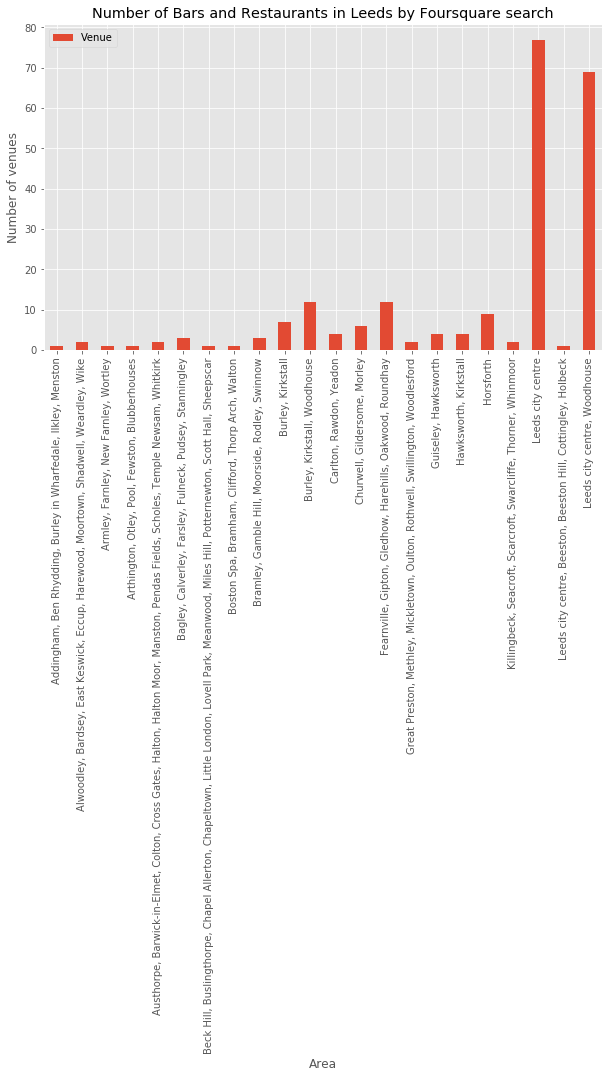

In [53]:
dfleedsfood.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Area') 
plt.ylabel('Number of venues') 
plt.title('Number of Bars and Restaurants in Leeds by Foursquare search')

plt.show()

In [54]:
# one hot encoding
Leeds_onehot = pd.get_dummies(Leeds_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Leeds_onehot ['Area'] = Leeds_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [Leeds_onehot.columns[-1]] + list(Leeds_onehot.columns[:-1])
Leeds_onehot = Leeds_onehot[fixed_columns]

Leeds_onehot.head()

,Area,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Brazilian Restaurant,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Cuban Restaurant,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant,Gastropub,Gay Bar,Hookah Bar,Hotel Bar,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pie Shop,Pizza Place,Portuguese Restaurant,Pub,Restaurant,Sandwich Place,Speakeasy,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Wine Bar
0,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Leeds city centre,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Leeds city centre,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Make a pie chart of the venues

In [55]:
df_venuepie = Leeds_venues.groupby('Venue Category').count()
df_venuepie.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,1,1,1,1,1,1
Argentinian Restaurant,2,2,2,2,2,2
Asian Restaurant,3,3,3,3,3,3
BBQ Joint,1,1,1,1,1,1
Bagel Shop,1,1,1,1,1,1


In [56]:
df_venuepie.drop(columns=['Area','Area Latitude','Area Longitude','Venue Latitude','Venue Longitude'],inplace=True)
df_venuepie.head()

,Venue
Venue Category,
American Restaurant,1
Argentinian Restaurant,2
Asian Restaurant,3
BBQ Joint,1
Bagel Shop,1


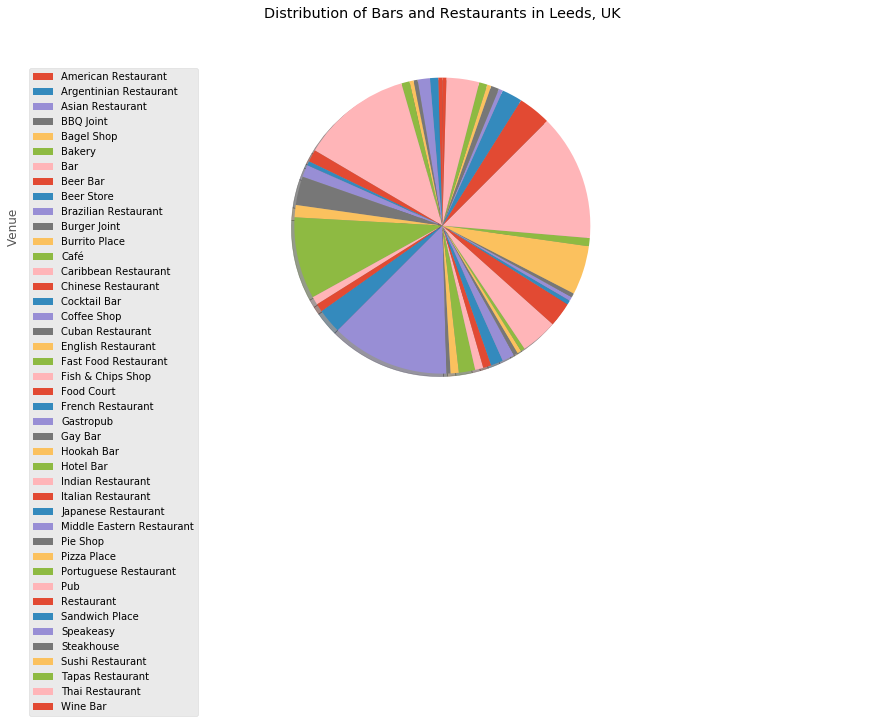

In [57]:
df_venuepie ['Venue'].plot(kind='pie',
                            figsize=(15, 6),
                            #autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Distribution of Bars and Restaurants in Leeds, UK', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels= df_venuepie.index, loc='upper left') 

plt.show()


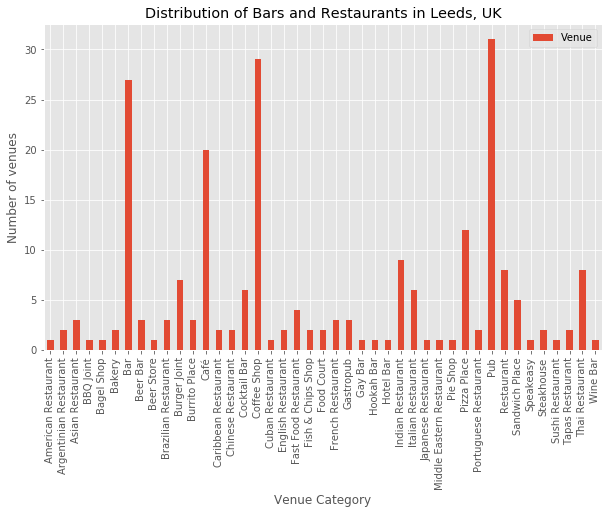

In [58]:
df_venuepie.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venue Category') 
plt.ylabel('Number of venues') 
plt.title('Distribution of Bars and Restaurants in Leeds, UK')

plt.show()

### Group rows by area and by taking the mean of the frequency of occurrence of each category

In [59]:
Leeds_grouped = Leeds_onehot.groupby('Area').mean().reset_index()
Leeds_grouped

,Area,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Brazilian Restaurant,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Cuban Restaurant,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant,Gastropub,Gay Bar,Hookah Bar,Hotel Bar,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pie Shop,Pizza Place,Portuguese Restaurant,Pub,Restaurant,Sandwich Place,Speakeasy,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Wine Bar
0,"Addingham, Ben Rhydding, Burley in Wharfedale,...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Alwoodley, Bardsey, East Keswick, Eccup, Harew...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Armley, Farnley, New Farnley, Wortley",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Arthington, Otley, Pool, Fewston, Blubberhouses",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Austhorpe, Barwick-in-Elmet, Colton, Cross Gat...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Bagley, Calverley, Farsley, Fulneck, Pudsey, S...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Beck Hill, Buslingthorpe, Chapel Allerton, Cha...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Boston Spa, Bramham, Clifford, Thorp Arch, Walton",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [60]:
Leeds_grouped.shape

(22, 44)

In [61]:
num_top_venues = 5

for hood in Leeds_grouped['Area']:
    print("----"+hood+"----")
    temp = Leeds_grouped[Leeds_grouped['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Addingham, Ben Rhydding, Burley in Wharfedale, Ilkley, Menston----
         venue  freq
0    Gastropub   1.0
1  Pizza Place   0.0
2      Gay Bar   0.0
3   Hookah Bar   0.0
4    Hotel Bar   0.0


----Alwoodley, Bardsey, East Keswick, Eccup, Harewood, Moortown, Shadwell, Weardley, Wike----
                 venue  freq
0   Italian Restaurant   0.5
1                  Pub   0.5
2  American Restaurant   0.0
3          Pizza Place   0.0
4              Gay Bar   0.0


----Armley, Farnley, New Farnley, Wortley----
                 venue  freq
0                  Pub   1.0
1  American Restaurant   0.0
2          Pizza Place   0.0
3              Gay Bar   0.0
4           Hookah Bar   0.0


----Arthington, Otley, Pool, Fewston, Blubberhouses----
                 venue  freq
0                 Café   1.0
1  American Restaurant   0.0
2    French Restaurant   0.0
3              Gay Bar   0.0
4           Hookah Bar   0.0


----Austhorpe, Barwick-in-Elmet, Colton, Cross Gates, Halton, Halton Moor, Ma

Putting the above into a Pandas dataframe

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

And creating a top 10 venues for each neighborhood

In [63]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Area_venues_sorted = pd.DataFrame(columns=columns)
Area_venues_sorted['Area'] = Leeds_grouped['Area']

for ind in np.arange(Leeds_grouped.shape[0]):
    Area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Leeds_grouped.iloc[ind, :], num_top_venues)

Area_venues_sorted



,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Addingham, Ben Rhydding, Burley in Wharfedale,...",Gastropub,Wine Bar,Fish & Chips Shop,English Restaurant,Cuban Restaurant
1,"Alwoodley, Bardsey, East Keswick, Eccup, Harew...",Pub,Italian Restaurant,Wine Bar,Burger Joint,Cuban Restaurant
2,"Armley, Farnley, New Farnley, Wortley",Pub,Wine Bar,Burger Joint,English Restaurant,Cuban Restaurant
3,"Arthington, Otley, Pool, Fewston, Blubberhouses",Café,Wine Bar,Burger Joint,English Restaurant,Cuban Restaurant
4,"Austhorpe, Barwick-in-Elmet, Colton, Cross Gat...",Gastropub,Pub,Wine Bar,Burger Joint,Cuban Restaurant
5,"Bagley, Calverley, Farsley, Fulneck, Pudsey, S...",Fast Food Restaurant,Indian Restaurant,Café,Fish & Chips Shop,English Restaurant
6,"Beck Hill, Buslingthorpe, Chapel Allerton, Cha...",Burger Joint,Wine Bar,English Restaurant,Cuban Restaurant,Coffee Shop
7,"Boston Spa, Bramham, Clifford, Thorp Arch, Walton",Restaurant,Wine Bar,Burger Joint,English Restaurant,Cuban Restaurant
8,"Bramley, Gamble Hill, Moorside, Rodley, Swinnow",Fast Food Restaurant,Coffee Shop,Pub,Burger Joint,English Restaurant
9,"Burley, Kirkstall",Cuban Restaurant,Coffee Shop,Sandwich Place,Hookah Bar,Pub


### Find the locations of the Thai Places

In [64]:
Leeds_onehot.head()

,Area,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Store,Brazilian Restaurant,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Cuban Restaurant,English Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant,Gastropub,Gay Bar,Hookah Bar,Hotel Bar,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Pie Shop,Pizza Place,Portuguese Restaurant,Pub,Restaurant,Sandwich Place,Speakeasy,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Wine Bar
0,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Leeds city centre,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Leeds city centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Leeds city centre,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
thaires = Leeds_venues

In [76]:
thaires.drop(thaires[thaires['Venue Category']=='American Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Argentinian Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Asian Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='BBQ Joint'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Bagel Shop'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Bakery'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Bar'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Beer Bar'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Beer Store'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Brazilian Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Burger Joint'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Burrito Place'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Café'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Caribbean Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Chinese Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Cocktail Bar'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Coffee Shop'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Cuban Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='English Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Fast Food Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Fish & Chips Shop'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Food Court'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='French Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Gastropub'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Gay Bar'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Hookah Bar'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Hotel Bar'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Indian Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Italian Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Japanese Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Middle Eastern Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Pie Shop'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Pizza Place'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Portuguese Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Pub'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Sandwich Place'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Speakeasy'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Steakhouse'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Sushi Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Tapas Restaurant'].index,inplace=True)
thaires.drop(thaires[thaires['Venue Category']=='Wine Bar'].index,inplace=True)
print('Complete')

Complete


In [77]:
thaires

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
34,Leeds city centre,53.79674,-1.54754,Sukhothai,53.799071,-1.547604,Thai Restaurant
61,Leeds city centre,53.79674,-1.54754,Chaophraya,53.794334,-1.544047,Thai Restaurant
73,Leeds city centre,53.79674,-1.54754,my Thai,53.797178,-1.553922,Thai Restaurant
76,Leeds city centre,53.79674,-1.54754,Mommy Thai,53.796024,-1.541822,Thai Restaurant
102,"Leeds city centre, Woodhouse",53.80123,-1.54597,My Thai,53.801343,-1.543007,Thai Restaurant
121,"Leeds city centre, Woodhouse",53.80123,-1.54597,Sukhothai,53.799071,-1.547604,Thai Restaurant
146,"Leeds city centre, Woodhouse",53.80123,-1.54597,Zaap Thai,53.800286,-1.539767,Thai Restaurant
158,"Leeds city centre, Woodhouse",53.80123,-1.54597,Thai Aroy Dee,53.799753,-1.539604,Thai Restaurant


### Remove places with Thai restaurants from main data frame and arrange by population 

In [78]:
dfLeeds.drop(dfLeeds[dfLeeds['Area']=='Leeds city centre'].index,inplace=True)
dfLeeds.drop(dfLeeds[dfLeeds['Area']=='Leeds city centre, Woodhouse'].index,inplace=True)
print('Complete')

Complete


In [79]:
dfLeeds.head()

,Postcode district,Area,Population,Latitude,Longitude
2,LS3,"Burley, Kirkstall, Woodhouse",2876,53.80128,-1.55964
3,LS4,"Burley, Kirkstall",9072,53.80944,-1.58082
4,LS5,"Hawksworth, Kirkstall",8507,53.81851,-1.60199
5,LS6,"Beckett Park, Burley, Headingley, Hyde Park, M...",48277,53.81928,-1.56704
6,LS7,"Beck Hill, Buslingthorpe, Chapel Allerton, Cha...",28266,53.81828,-1.53971


In [80]:
dfLeeds.sort_values('Population', inplace=True, ascending=False)

In [82]:
dfLeeds

,Postcode district,Area,Population,Latitude,Longitude
7,LS8,"Fearnville, Gipton, Gledhow, Harehills, Oakwoo...",48286,53.82445,-1.50926
5,LS6,"Beckett Park, Burley, Headingley, Hyde Park, M...",48277,53.81928,-1.56704
16,LS17,"Alwoodley, Bardsey, East Keswick, Eccup, Harew...",43426,53.85958,-1.52709
11,LS12,"Armley, Farnley, New Farnley, Wortley",40949,53.79062,-1.59618
24,LS25,"Aberford, Garforth, Hillam, Kippax, Ledsham, M...",39917,53.78584,-1.33059
27,LS28,"Bagley, Calverley, Farsley, Fulneck, Pudsey, S...",37896,53.80163,-1.66897
15,LS16,"Adel, Bramhope, Cookridge, Eccup, Far Headingl...",36457,53.85086,-1.60169
8,LS9,"Burmantofts, Cross Green, East End Park, Gipto...",36406,53.79928,-1.50803
26,LS27,"Churwell, Gildersome, Morley",35695,53.74839,-1.60266
9,LS10,"Belle Isle, Hunslet, Leeds city centre, Middle...",35534,53.76162,-1.53123


### Final note

Thank you very much for viewing this notebook. This notebook will be used as part of the Applied Data Science Capstone Project for the IBM Data Science Professional Certificate. 